In [1]:
import numpy as np
import pandas as pd

In [19]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
df = pd.read_csv(url, header=None, na_values = '?')

In [21]:
dataframe = df
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


In [22]:
from sklearn.impute import KNNImputer

In [24]:
n_neighbors = 5
# How to choose this? Cross-validation? What about in the case of unsupervised learning?

imputer = KNNImputer(n_neighbors = n_neighbors, weights = 'uniform', metric = 'nan_euclidean')

In [30]:
# Look at results for imputation for dim 16 and 17
missing_idx = df[[16, 17]].isna().any(axis = 1)
missing = df[missing_idx]
not_missing = df[~missing_idx]

In [33]:
X = df.drop([23])

In [36]:
imputer.fit(X)
Xtrans = imputer.transform(X)

In [44]:
Xtrans = pd.DataFrame(Xtrans)
Xtrans_missing = Xtrans[missing_idx]

/Users/bguo/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/Users/bguo/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bguo/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


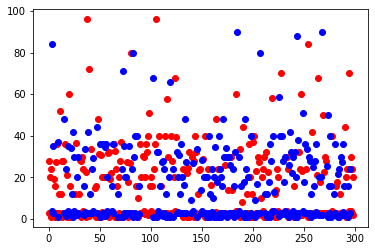

In [52]:
import matplotlib.pyplot as plt
temp = Xtrans[[5, 6]]
plt.plot(temp[~missing_idx], 'o', c = "red")
plt.plot(temp[missing_idx], 'o', c = "blue")